
\newpage

1 Considere os seguintes algoritmos evolucionários: Estratégias de evolução, programação genética, evolução diferencial e algoritmos de estimação de distribuição. Implemente cada um dos modelos, para os quais pede-se:

(a) Encontre o ótimo da função Ackley bidimensional.


$$f(x)=-\alpha exp( -b\sqrt{\frac{1}{d} \sum \limits _ {i=1} ^{d}x^2_i }) - exp( \frac{1}{d} \sum \limits _ {i=1} ^{d} \cos(cx_i) ) + a + exp(1)$$ 
$$Onde \ a=20, \ b=0.2, \ c=2\pi, \ x_{i} \in [-32.768; 32.768]$$


(b) Encontre o ótimo da função Griewank bidimensional.


$$f(x)=\sum \limits _ {i=1} ^{d} \frac{x^2 _i}{4000} - \prod \cos( \frac{x_i}{\sqrt{i}}) + 1 $$
$$Onde \ x_i \in [-600, 600]$$


(c) Encontre o ótimo da função Trid de dimensão d=5.


$$f(x) = \sum \limits _{i=1} ^{d} (x_i-1)^2 - \sum \limits _{i=2} ^{d} x_i x_{i-1} $$
$$ Onde \ x_i \in [-d^2, d^2], \ i=1,...,d $$


(d) Encontre o ótimo da função Colville de dimensão d=4


$$f(x)=100(x^2_1 - x_2)^2 + (x_1 - 1)^2 + (x_3 - 1)^2 + 90 (x^2_3 - x_4)^2 + 10.1 ( (x_2 - 1)^2 + (x_4 - 1)^2 ) + 19.8 (x_2 - 1)(x_4 - 1) $$
$$Onde \ x_i \in [-10, 10], \ i=1,...,4$$

\newpage

In [ ]:
from utils.de         import DifferentialEvolution
from utils.eda        import CompactGA 
from utils.statistics import Statistics
from functions        import *

import matplotlib.pyplot as plt

from utils.GA import GA
from utils.GA import Model as ModelGA
import numpy as np
from utils.ES import ES
from utils.ES import Model as ModelES

import time

# Resolução do Ítem (a)
## Gráfico da Função


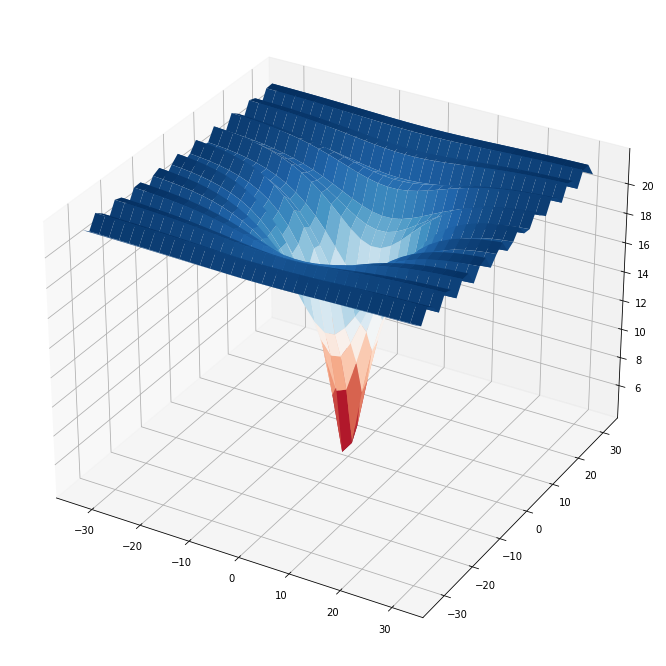

In [ ]:
Ackley().graph()

### Evolução Diferencial

In [ ]:
all_best_solutions = []
    
de = DifferentialEvolution(
    ng=100,
    np=200,
    cr=0.9, 
    f=0.8, 
    evfunc='Ackley', 
    algorithm='best_1_bin'
)
de.evolve()

all_best_solutions = de.get_all_best_solutions()


GERAÇÃO: 100


Para a minimização da função de Ackley, os parâmetros utilizados para o algorítmo de Evolução Diferencial cosistiram em:

    1. Número de Gerações: 100 

    2. Tamanho da População: 200 

    3. Taxa de Cruzamento: 0.9 

    3. Fator de Escala: 0.8 

O algorítmo de mutação empregado consistiu no DE/best/1/bin e o critério de parada do algoritmo consiste no número de gerações.

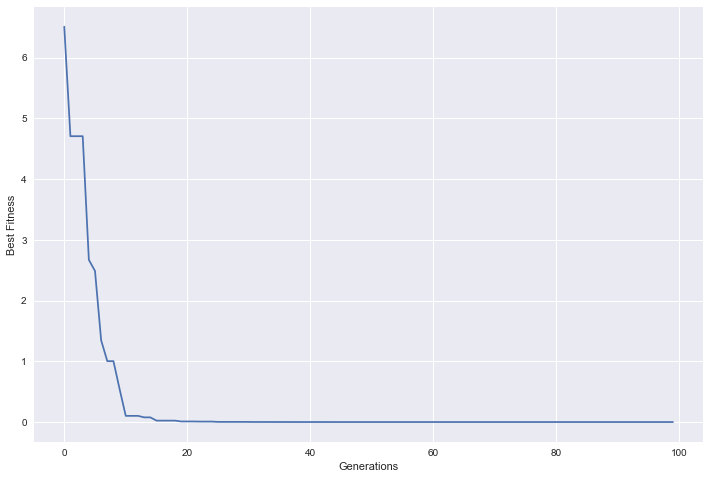

In [ ]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()


O gráfico acima destaca o processo de convergência das soluções candidatas para a solução ótima. Percebe-se que o algorítmo converge para a solução ótima em menos de 20 gerações.


In [ ]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 3.0456472899231814e-11	Q1: 1.738719435095959e-08	Q2: 8.791494126914046e-06	Q3: 0.003687447932915422	Max: 9.431788683400555e-11
0.3029855824608885



Em torno de 50% das soluções candidatas durante a execução do algoritmo obtiveram o fitness entre 1.738719435095959e-08 e 0.00368, o que destaca que, em sua maioria, as soluções candidatas estavam próximas da solução ótima.


A seguir, será realizada a execução do algoritmo de Evolução Diferencial 30 vezes, com o objetivo de analizar o seu tempo de execução e a melhor solução encontrada en cada uma das iterações. 

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    de = DifferentialEvolution(
        ng=100,
        np=100,
        cr=0.9, 
        f=0.8, 
        evfunc='Ackley', 
        algorithm='best_1_bin'
    )
    de.evolve()

    all_best_solutions.append(de.get_best_solution())
    all_execution_time.append(de.get_execution_time())


GERAÇÃO: 100

In [ ]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 2.5446400542250557e-11
Variance: 3.211273975389663e-22
Standard Deviation: 1.7920027833096864e-11


A partir das 30 execuções, pode-se observar que a média das melhores soluções candidatas ficou em torno de 2.5446400542250557e-11 e o desvio padrão 1.7920027833096864e-11.

In [ ]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 1.9204307079315186
Variance: 0.028128673059042434
Standard Deviation: 0.16771604890123792


O tempo de execução médio em segundos de cada uma das iterações ficou em torno de 1.92 e desvio padrão de 0.1677.

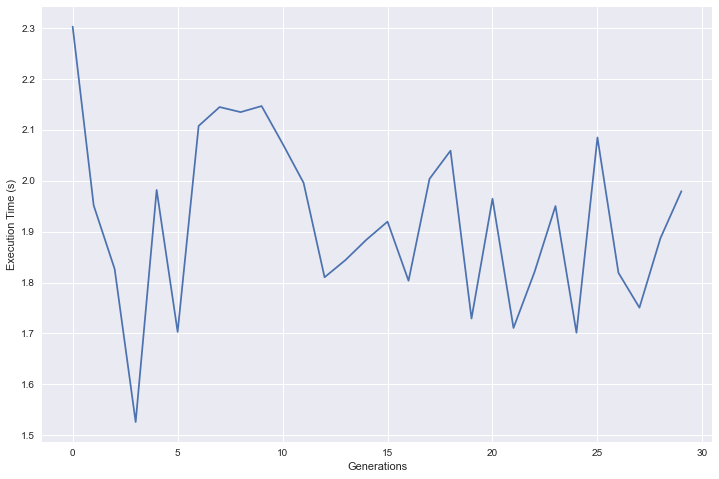

In [ ]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

O gráfico acima destaca o tempo de execução do algorítmo de Evolução Diferencial em cada uma das 30 iterações.

### Algorítmos de Estimação de Distribuição

In [ ]:
all_best_solutions = []
    
cga = CompactGA(
    ng=100,
    np=50, 
    pmin=0.04, 
    pmax=0.93, 
    alpha=0.03, 
    nbits=5, 
    evfunc='Ackley'
)
cga.evolve()

all_best_solutions = cga.get_all_best_solutions()

GERAÇÃO: 100

Para a minimização da função de Ackley, os parâmetros utilizados para o algorítmo de Estimação de Distribuição  GA Compacto cosistiram em:
    
    1. Número de Gerações: 100
    
    2. Tamanho da População: 50
    
    3. Probabilidade Mínima: 0.04
    
    4. Probabilidade Máxima: 0.93
    
    5. Taxa de Aprendizado: 0.03
    

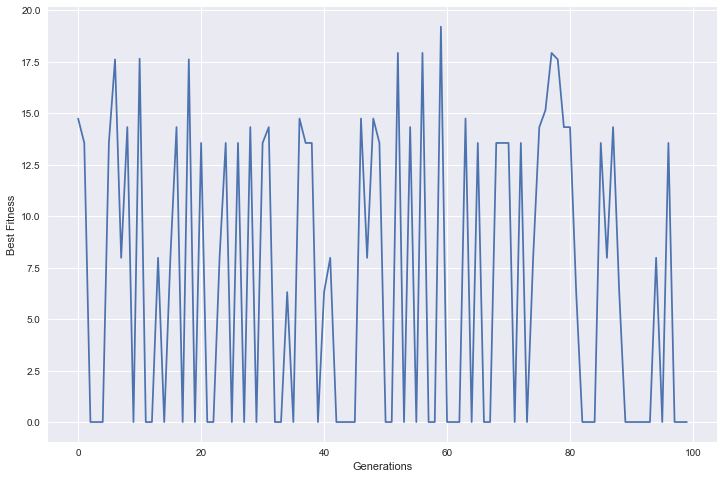

In [ ]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

O gráfico acima apresenta o fitness da melhor solução em cada geração.

In [ ]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 6.366907001620348e-12	Q1: 8.966040798696895e-09	Q2: 2.5281451540681843e-05	Q3: 0.0165065604971244	Max: 4.306923706565158e-10
0.32664603108552226


Cerca de 50% das melhores soluções candidatas obtveram um valor do fitness entre 8.966040798696895e-09 e 0.0165065604971244.

A seguir, será realizada a execução do algoritmo de Estimação de Distribuição GA Compacto 30 vezes, com o objetivo de analizar o seu tempo de execução e a melhor solução encontrada en cada uma das iterações. 

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    cga = CompactGA(
        ng=100,
        np=50, 
        pmin=0.04, 
        pmax=0.93, 
        alpha=0.03, 
        nbits=5, 
        evfunc='Ackley'
    )
    cga.evolve()

    all_best_solutions.append(cga.get_best_solution())
    all_execution_time.append(cga.get_execution_time())

GERAÇÃO: 100

In [ ]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 4.440892098500626e-16
Variance: 0.0
Standard Deviation: 0.0


A partir das 30 execuções, pode-se observar que a média das melhores soluções candidatas ficou em torno de 4.440892098500626e-16 e o desvio padrão 0.0.

In [ ]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 1.9083032925923666
Variance: 0.010296205440169058
Standard Deviation: 0.10147021947433177


O tempo de execução médio em segundos de cada uma das iterações ficou em torno de 1.90 e desvio padrão de 0.101.

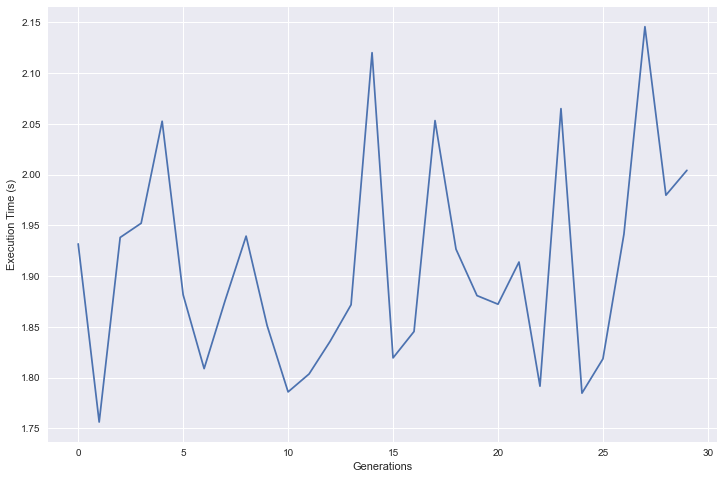

In [ ]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

O gráfico acima destaca o tempo de execução do algorítmo de Estimação de Distribuição GA Compacto em cada uma das 30 iterações.

## Algoritmo Genético

Para esse algorítmo utilizou-se uma população de 700 indivíduos e taxa de mutação de 1% rodando durante 100 gerações. Ademais, A recombinação foi a _"whole arithmetic recombination"_, a mutação foi _"uniform mutation"_ e a seleção tanto de pais, quanto de prole foi _"fitness proportional selection"_. Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 100 gerações.

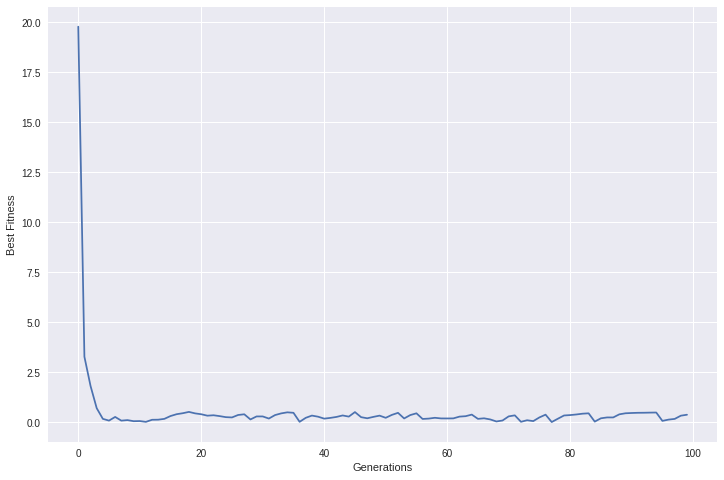

In [ ]:
UB = 32
LB = -32
pop = np.random.uniform(low=LB, high=UB, size=(700,2))
model = ModelGA(
pop,
Ackley().compute, 
"whole arithmetic recombination", 
"uniform mutation",
"fitness proportional selection",
"fitness proportional selection",
0.01,
100,
UB,
LB,
0)
    
ga_alg = GA(model)
stop = time.time();
ga_alg.run(model)
stop = time.time();

x = range(0,100)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "0,16" com um desvio padrão de "0,13". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 3,9 s.

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    ga_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

In [ ]:
statistics = Statistics(all_best_solutions)

print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 0.16186891044770194
Variance: 0.016926329998450913
Standard Deviation: 0.13010122981144687


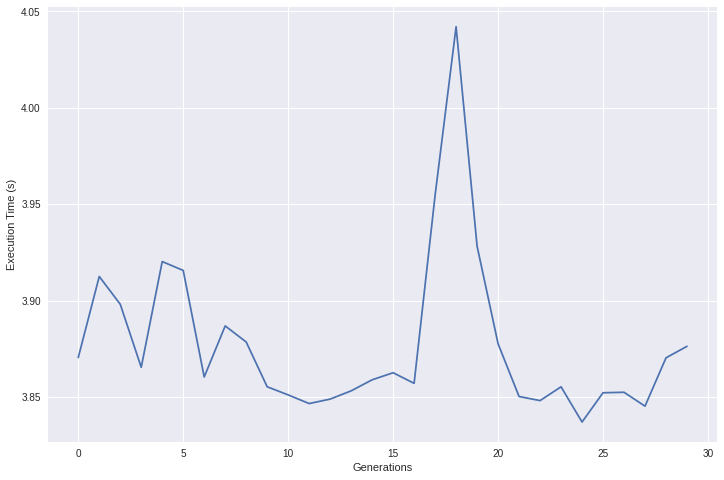

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

## Estratégia de Evolução

Para esse algorítmo utilizou-se um "mu" de 40, um "lambda" de 300, um "sigma" de 2 (o qual muda comforme a regra de 1/5). Ademais, não houve recombinação, a mutação foi _"uniform mutation"_, a seleção de pais foi uniforme e a de filhos foi a _"mu,lambda"_. Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 700 gerações.

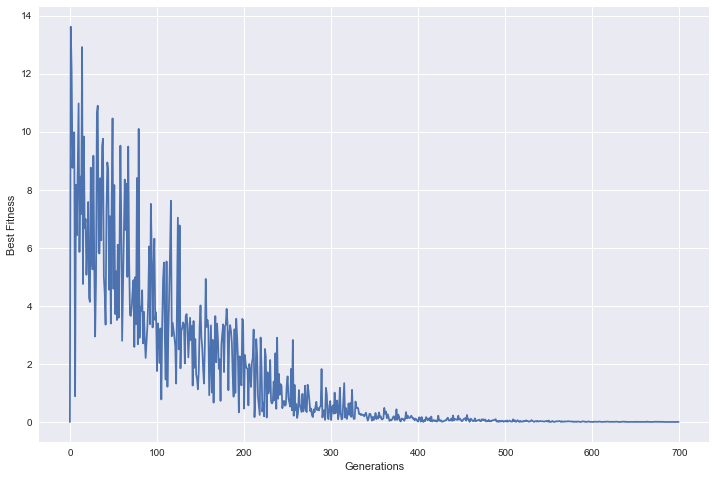

In [ ]:
GENERATIONS = 700
UB = 32
LB = -32
pop_size = 40
pop = np.random.uniform(low=-32, high=32, size=(pop_size,2))
model = ModelES(
pop,
Ackley().compute,
"uniform mutation",
"mu,lambda",
"random",
2,
300,
40,
10,
GENERATIONS,
UB,
LB,
0)

es_alg = ES(model)

es_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "1.95e-7" com um desvio padrão de "1.05e-6". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 7.4s.

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    es_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

In [ ]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 1.9541260186291726e-07
Variance: 1.1064059789116883e-12
Standard Deviation: 1.051858345458973e-06


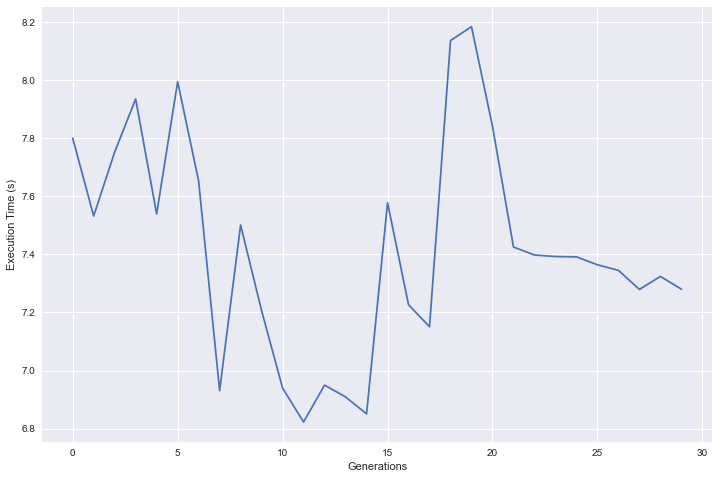

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

# Resolução do Ítem (b)
## Gráfico da Função


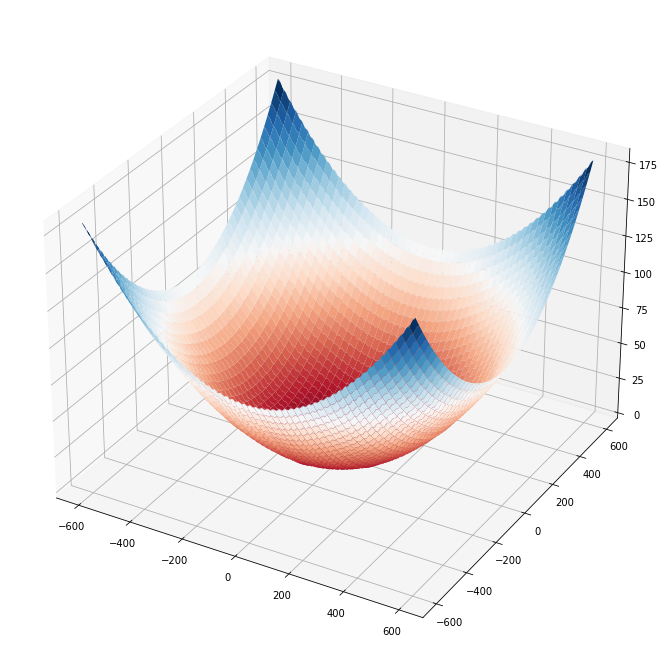

In [ ]:
Griewank().graph()

### Evolução Diferencial

In [ ]:
all_best_solutions = []
    
de = DifferentialEvolution(
    ng=50,
    np=100,
    cr=0.9, 
    f=0.8, 
    evfunc='Griewank', 
    algorithm='best_1_bin'
)
de.evolve()

all_best_solutions = de.get_all_best_solutions()


GERAÇÃO: 50


Para a minimização da função de Ackley, os parâmetros utilizados para o algorítmo de Evolução Diferencial cosistiram em:

    1. Número de Gerações: 50 

    2. Tamanho da População: 100 

    3. Taxa de Cruzamento: 0.9 

    3. Fator de Escala: 0.8 

O algorítmo de mutação empregado consistiu no DE/best/1/bin e o critério de parada do algoritmo consiste no número de gerações.

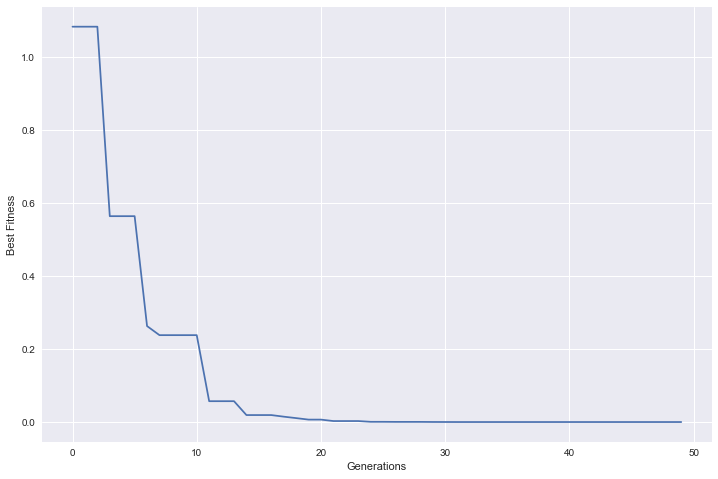

In [ ]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

O gráfico acima destaca o processo de convergência das soluções candidatas para a solução ótima. Percebe-se que o algorítmo converge para a solução ótima após a vigésima geração.


In [ ]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 1.2649420844113024e-10	Q1: 1.3048746017041424e-07	Q2: 0.0006130348929314078	Q3: 0.05707625046647813	Max: 7.409132085633985e-09
0.12861455543410172



Em torno de 50% das soluções candidatas durante a execução do algoritmo obtiveram o fitness entre 1.3048746017041424e-07 e 0.0570, o que destaca que, em sua maioria, as soluções candidatas estavam próximas da solução ótima.



A seguir, será realizada a execução do algoritmo de Evolução Diferencial 30 vezes, com o objetivo de analizar o seu tempo de execução e a melhor solução encontrada en cada uma das iterações. 


In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    de = DifferentialEvolution(
        ng=50,
        np=100,
        cr=0.9, 
        f=0.8, 
        evfunc='Griewank', 
        algorithm='best_1_bin'
    )
    de.evolve()

    all_best_solutions.append(de.get_best_solution())
    all_execution_time.append(de.get_execution_time())


GERAÇÃO: 50

In [ ]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 2.8553099625424256e-09
Variance: 2.535659459008345e-17
Standard Deviation: 5.035533198190977e-09



A partir das 30 execuções, pode-se observar que a média das melhores soluções candidatas ficou em torno de 2.8553099625424256e-09 e o desvio padrão 5.035533198190977e-09.

In [ ]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 1.3050068219502766
Variance: 0.00744970726953827
Standard Deviation: 0.08631168674946789


O tempo de execução médio em segundos de cada uma das iterações ficou em torno de 1.30 e desvio padrão de 0.08.

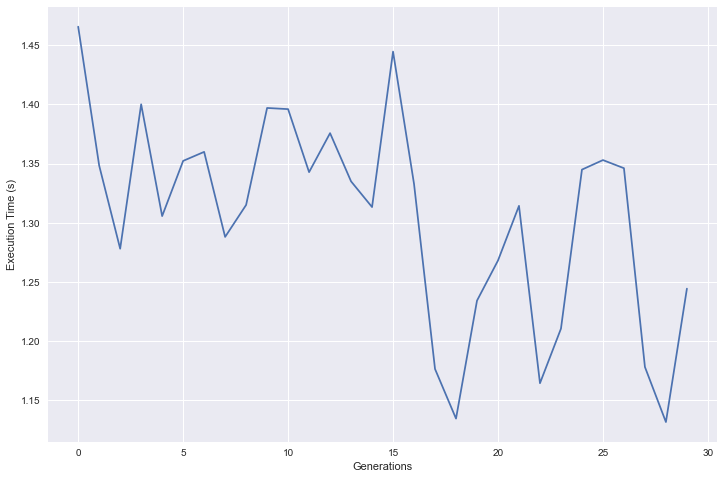

In [ ]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

O gráfico acima destaca o tempo de execução do algorítmo de Evolução Diferencial em cada uma das 30 iterações.

### Algorítmos de Estimação de Distribuição

In [ ]:
all_best_solutions = []
    
cga = CompactGA(
    ng=100,
    np=50, 
    pmin=0.04, 
    pmax=0.93, 
    alpha=0.03, 
    nbits=8, 
    evfunc='Griewank'
)
cga.evolve()

all_best_solutions = cga.get_all_best_solutions()

GERAÇÃO: 100

Para a minimização da função de Ackley, os parâmetros utilizados para o algorítmo de Estimação de Distribuição  GA Compacto cosistiram em:
    
    1. Número de Gerações: 100
    
    2. Tamanho da População: 50
    
    3. Probabilidade Mínima: 0.04
    
    4. Probabilidade Máxima: 0.93
    
    5. Taxa de Aprendizado: 0.03
    

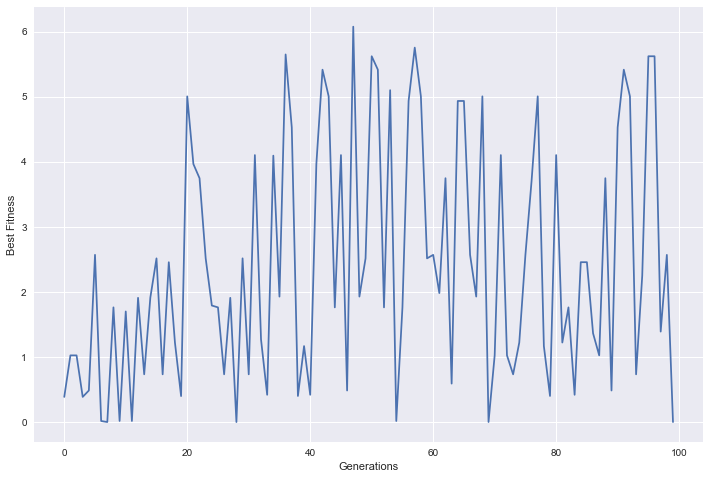

In [ ]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

O gráfico acima apresenta o fitness da melhor solução em cada geração.

In [ ]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 0.0	Q1: 0.7330948685524388	Q2: 1.920040712294585	Q3: 4.095001853289055	Max: 0.3969475601756888
2.403819265358565


Cerca de 50% das melhores soluções candidatas obtveram um valor do fitness entre 0.733 e 4.095.

A seguir, será realizada a execução do algoritmo de Estimação de Distribuição GA Compacto 30 vezes, com o objetivo de analizar o seu tempo de execução e a melhor solução encontrada en cada uma das iterações. 

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    cga = CompactGA(
        ng=100,
        np=50, 
        pmin=0.04, 
        pmax=0.93, 
        alpha=0.03, 
        nbits=8, 
        evfunc='Griewank'
    )
    cga.evolve()

    all_best_solutions.append(cga.get_best_solution())
    all_execution_time.append(cga.get_execution_time())

GERAÇÃO: 100

In [ ]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 0.004933671318904779
Variance: 0.0005631359569204784
Standard Deviation: 0.02373048581298913


A partir das 30 execuções, pode-se observar que a média das melhores soluções candidatas ficou em torno de 0.0049 e o desvio padrão 0.0237.

In [ ]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 1.7580960830052694
Variance: 0.0031858613097850564
Standard Deviation: 0.056443434603017


O tempo de execução médio em segundos de cada uma das iterações ficou em torno de 1.75 e desvio padrão de 0.056.

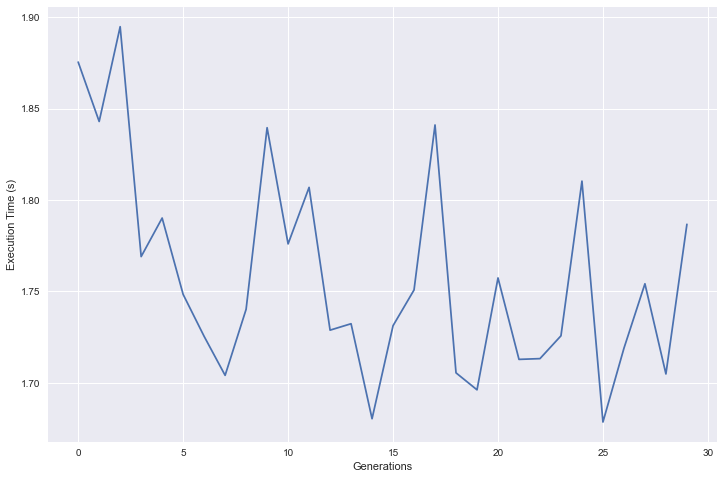

In [ ]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

O gráfico acima destaca o tempo de execução do algorítmo de Estimação de Distribuição GA Compacto em cada uma das 30 iterações.

## Algoritmo Genético

Para esse algorítmo utilizou-se uma população de 700 indivíduos e taxa de mutação de 1% rodando durante 100 gerações. Ademais, A recombinação foi a _"whole arithmetic recombination"_, a mutação foi _"uniform mutation"_ e a seleção tanto de pais, quanto de prole foi _"fitness proportional selection"_. Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 100 gerações.

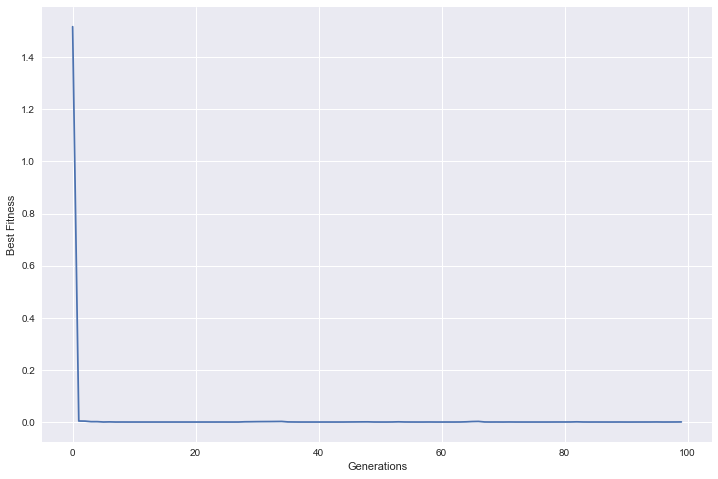

In [ ]:
UB = 32
LB = -32
pop = np.random.uniform(low=LB, high=UB, size=(700,2))
model = ModelGA(
pop,
Griewank().compute, 
"whole arithmetic recombination", 
"uniform mutation",
"fitness proportional selection",
"fitness proportional selection",
0.01,
100,
UB,
LB,
0)
    
ga_alg = GA(model)
stop = time.time();
ga_alg.run(model)
stop = time.time();

x = range(0,100)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "5,5e-4" com um desvio padrão de "8,7e-4" . Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 7,3 s.

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time()
    ga_alg.run(model)
    stop = time.time()
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

In [ ]:
statistics = Statistics(all_best_solutions)

print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 0.0005467987489755818
Variance: 7.741342197329419e-07
Standard Deviation: 0.0008798489755253125


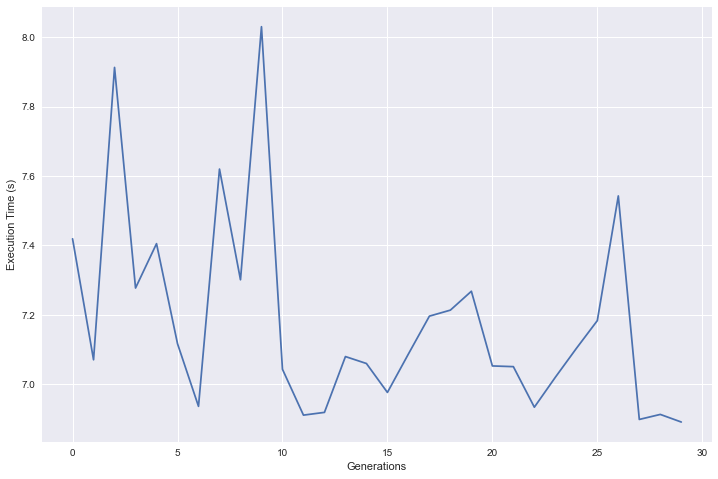

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

## Estratégia de Evolução

Para esse algorítmo utilizou-se um "mu" de 40, um "lambda" de 300, um "sigma" de 2 (o qual muda comforme a regra de 1/5). Ademais, não houve recombinação, a mutação foi "uniform mutation", a seleção de pais foi uniforme e a de filhos foi a "mu,lambda". Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 700 gerações.

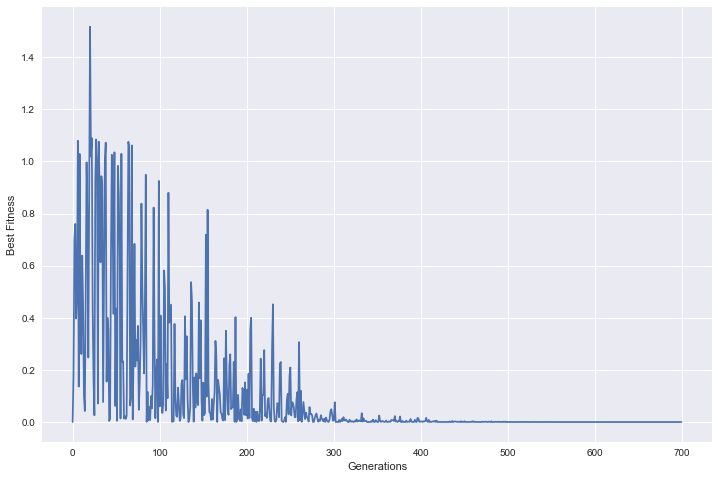

In [ ]:
GENERATIONS = 700;
UB = 32
LB = -32
pop_size = 40
pop = np.random.uniform(low=-32, high=32, size=(pop_size,2))
model = ModelES(
pop,
Griewank().compute,
"uniform mutation",
"mu,lambda",
"random",
2,
300,
40,
10,
GENERATIONS,
UB,
LB,
0)

es_alg = ES(model)

es_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "1,05e-13" com um desvio padrão de "5,65e-13". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 6.6s.

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    es_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

In [ ]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 1.0490127285341563e-13
Variance: 3.1912403434173597e-25
Standard Deviation: 5.64910642793828e-13


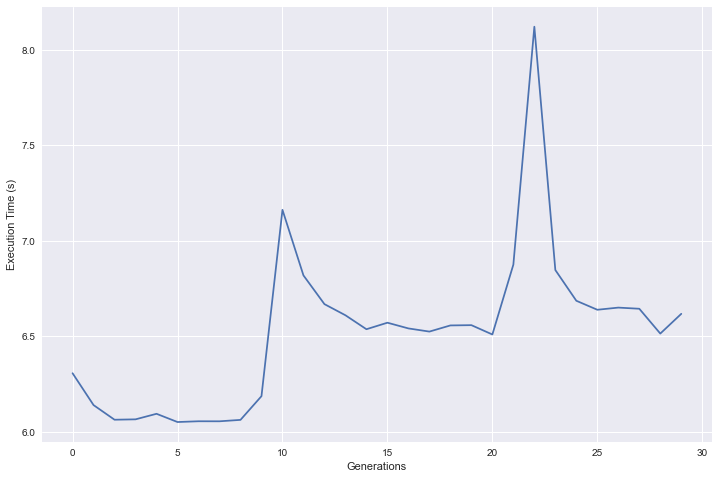

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

# Resolução do Ítem (c)


### Evolução Diferencial

In [ ]:
all_best_solutions = []
    
de = DifferentialEvolution(
    ng=100,
    np=100,
    cr=0.9, 
    f=0.8, 
    evfunc='Trid', 
    algorithm='best_1_bin'
)
de.evolve()

all_best_solutions = de.get_all_best_solutions()


GERAÇÃO: 100


Para a minimização da função de Ackley, os parâmetros utilizados para o algorítmo de Evolução Diferencial cosistiram em:

    1. Número de Gerações: 100 

    2. Tamanho da População: 100 

    3. Taxa de Cruzamento: 0.9 

    3. Fator de Escala: 0.8 

O algorítmo de mutação empregado consistiu no DE/best/1/bin e o critério de parada do algoritmo consiste no número de gerações.


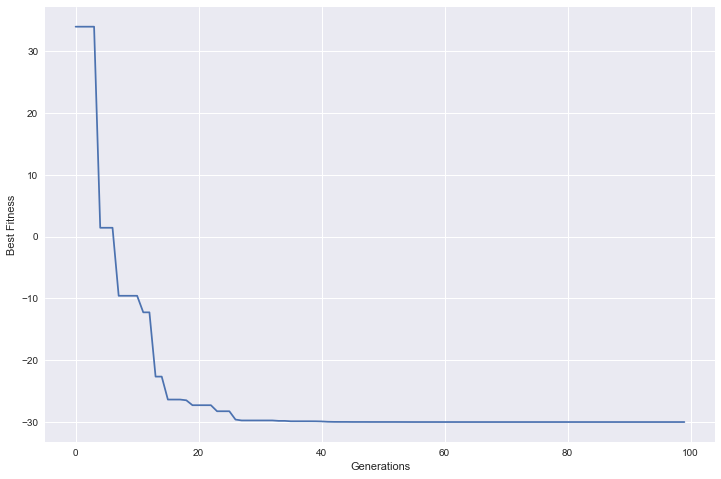

In [ ]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()


O gráfico acima destaca o processo de convergência das soluções candidatas para a solução ótima. Percebe-se que o algorítmo converge para a solução ótima após a vigésima geração.


In [ ]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: -29.999999568959254	Q1: -29.99991794987318	Q2: -29.99018350411515	Q3: -28.254125914960923	Max: -29.999994078037247
-24.838464302044567



Em torno de 50% das soluções candidatas durante a execução do algoritmo obtiveram o fitness entre -29.999 e -28.254, o que destaca que, em sua maioria, as soluções candidatas estavam próximas da solução ótima.

A seguir, será realizada a execução do algoritmo de Evolução Diferencial 30 vezes, com o objetivo de analizar o seu tempo de execução e a melhor solução encontrada en cada uma das iterações. 

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    de = DifferentialEvolution(
        ng=100,
        np=100,
        cr=0.9, 
        f=0.8, 
        evfunc='Trid', 
        algorithm='best_1_bin'
    )
    de.evolve()

    all_best_solutions.append(de.get_best_solution())
    all_execution_time.append(de.get_execution_time())


GERAÇÃO: 100

In [ ]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: -29.999999119786665
Variance: 2.8279631448935454e-13
Standard Deviation: 5.317859668037081e-07


A partir das 30 execuções, pode-se observar que a média das melhores soluções candidatas ficou em torno de -29.99 e o desvio padrão 5.31.

In [ ]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 3.188835120201111
Variance: 0.18404917740118423
Standard Deviation: 0.42900953066474434


O tempo de execução médio em segundos de cada uma das iterações ficou em torno de 3.18 e desvio padrão de 0.429.

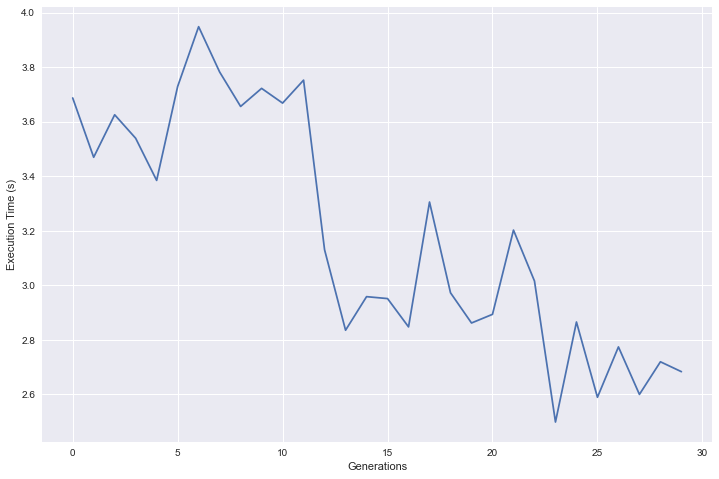

In [ ]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

O tempo de execução médio em segundos de cada uma das iterações ficou em torno de 1.92 e desvio padrão de 0.1677.

### Algorítmos de Estimação de Distribuição

In [ ]:
all_best_solutions = []
    
cga = CompactGA(
    ng=100,
    np=50, 
    pmin=0.04, 
    pmax=0.93, 
    alpha=0.03, 
    nbits=5, 
    evfunc='Trid'
)
cga.evolve()

all_best_solutions = cga.get_all_best_solutions()

GERAÇÃO: 100

Para a minimização da função de Ackley, os parâmetros utilizados para o algorítmo de Estimação de Distribuição  GA Compacto cosistiram em:
    
    1. Número de Gerações: 100
    
    2. Tamanho da População: 50
    
    3. Probabilidade Mínima: 0.04
    
    4. Probabilidade Máxima: 0.93
    
    5. Taxa de Aprendizado: 0.03
    

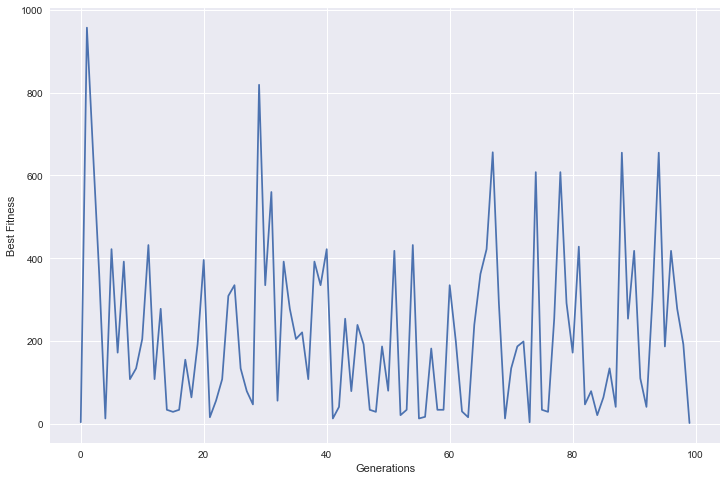

In [ ]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

O gráfico acima apresenta o fitness da melhor solução em cada geração.

In [ ]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 3.98	Q1: 41.0	Q2: 187.0	Q3: 335.0	Max: 20.6
221.05


Cerca de 50% das melhores soluções candidatas obtveram um valor do fitness entre 41.0 e 335.0. 

A seguir, será realizada a execução do algoritmo de Estimação de Distribuição GA Compacto 30 vezes, com o objetivo de analizar o seu tempo de execução e a melhor solução encontrada en cada uma das iterações. 

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    cga = CompactGA(
        ng=100,
        np=20, 
        pmin=0.04, 
        pmax=0.93, 
        alpha=0.03, 
        nbits=5, 
        evfunc='Trid'
    )
    cga.evolve()

    all_best_solutions.append(cga.get_best_solution())
    all_execution_time.append(cga.get_execution_time())

GERAÇÃO: 100

In [ ]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: -1.6
Variance: 88.77333333333334
Standard Deviation: 9.421960164070603


A partir das 30 execuções, pode-se observar que a média das melhores soluções candidatas ficou em torno de -1.6 e o desvio padrão 9.421.

In [ ]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 2.1821346839269
Variance: 0.05970475952880816
Standard Deviation: 0.24434557399062534


O tempo de execução médio em segundos de cada uma das iterações ficou em torno de 2.18 e desvio padrão de 0.244.

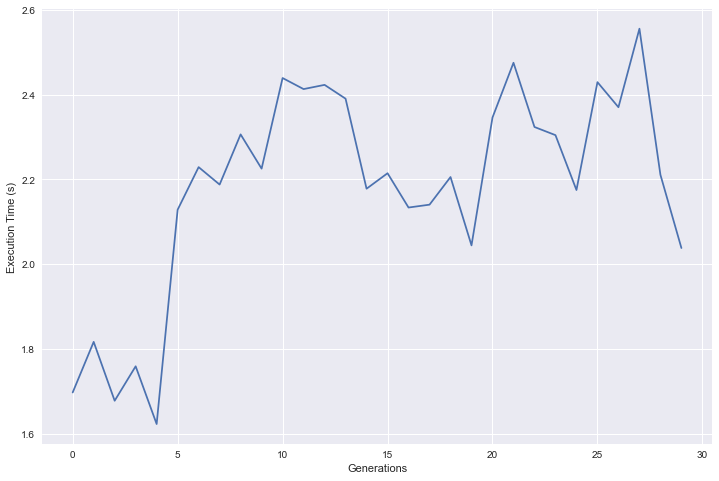

In [ ]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

O gráfico acima destaca o tempo de execução do algorítmo de Estimação de Distribuição GA Compacto em cada uma das 30 iterações.

## Algoritmo Genético

Para esse algorítmo utilizou-se uma população de 700 indivíduos e taxa de mutação de 1%. Ademais, A recombinação foi a _"whole arithmetic recombination"_, a mutação foi _"uniform mutation"_ e a seleção tanto de pais, quanto de prole foi _"fitness proportional selection"_. Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 2000 gerações.

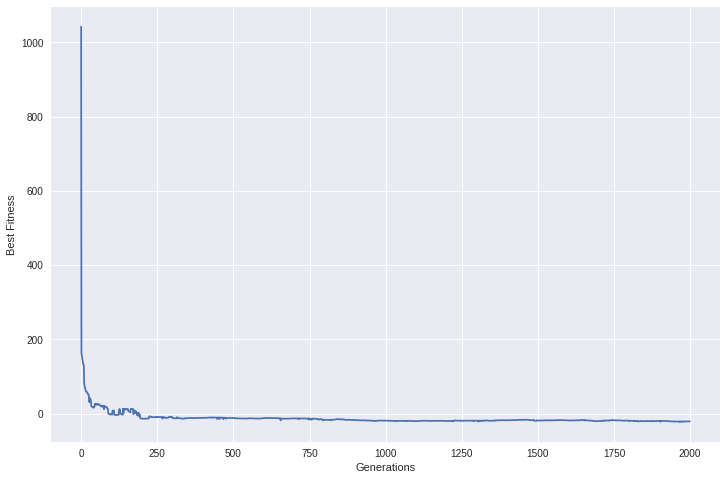

In [ ]:
UB = 32
LB = -32
GENERATIONS = 2000
pop = np.random.uniform(low=LB, high=UB, size=(400,5))
model = ModelGA(
    pop,
    Trid().compute, 
    "whole arithmetic recombination", 
    "uniform mutation",
    "fitness proportional selection",
    "fitness proportional selection",
    0.01,
    GENERATIONS,
    UB,
    LB,
    0,
    alpha=0.99)
    
ga_alg = GA(model)
ga_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    ga_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "-28,5" com um desvio padrão de "1,02". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 31 s.

In [ ]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: -28.497466475272226
Variance: 1.0315777009490064
Standard Deviation: 1.0156661365571888


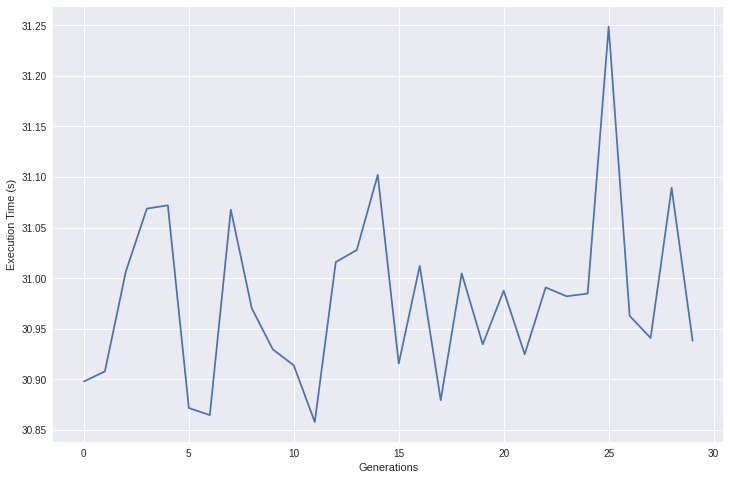

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

## Estratégia de Evolução

Para esse algorítmo utilizou-se um "mu" de 40, um "lambda" de 300, um "sigma" de 2 (o qual muda comforme a regra de 1/5). Ademais, não houve recombinação, a mutação foi "uniform mutation", a seleção de pais foi uniforme e a de filhos foi a "mu,lambda". Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 1000 gerações.

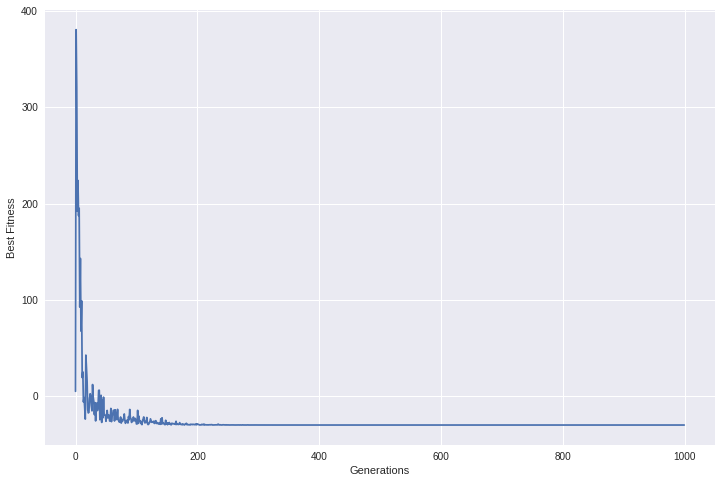

In [ ]:
GENERATIONS = 1000
pop_size = 40
pop = np.random.uniform(low=-32, high=32, size=(pop_size,5))
model = ModelES(
    pop,
    Trid().compute,
    "uniform mutation",
    "mu,lambda",
    "random",
    2,
    300,
    40,
    10,
    1000,
    UB,
    LB,
    0)
    
    
es_alg = ES(model)
es_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "-30" com um desvio padrão de "1,58e-14". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 4,41 s.

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    es_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

In [ ]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: -30.000000000000046
Variance: 2.4822823150954506e-28
Standard Deviation: 1.5755260439280116e-14


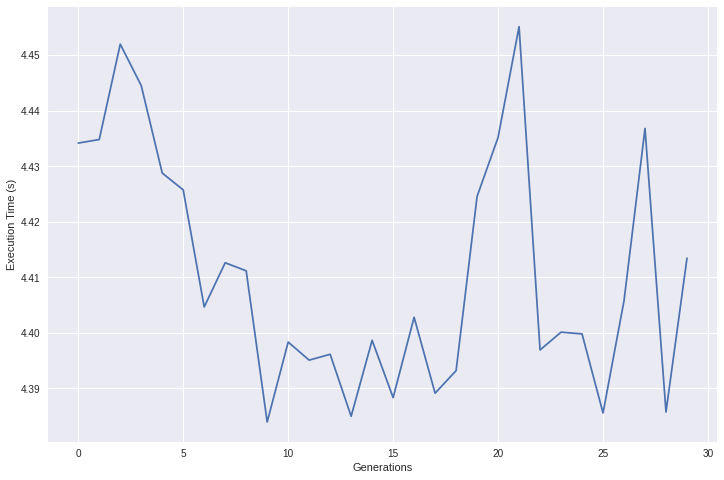

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

# Resolução do Ítem (d)



### Evolução Diferencial

In [ ]:
all_best_solutions = []
    
de = DifferentialEvolution(
    ng=100,
    np=100,
    cr=0.9, 
    f=0.8, 
    evfunc='Colville', 
    algorithm='best_1_bin'
)
de.evolve()

all_best_solutions = de.get_all_best_solutions()


GERAÇÃO: 100


Para a minimização da função de Ackley, os parâmetros utilizados para o algorítmo de Evolução Diferencial cosistiram em:

    1. Número de Gerações: 100 

    2. Tamanho da População: 200 

    3. Taxa de Cruzamento: 0.9 

    3. Fator de Escala: 0.8 

O algorítmo de mutação empregado consistiu no DE/best/1/bin e o critério de parada do algoritmo consiste no número de gerações.

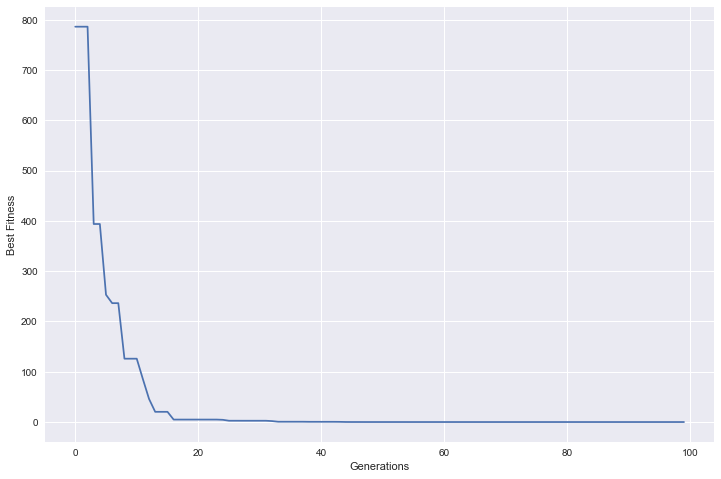

In [ ]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()


O gráfico acima destaca o processo de convergência das soluções candidatas para a solução ótima. Percebe-se que o algorítmo converge para a solução ótima em menos de 20 gerações.


In [ ]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 1.25941144589378e-05	Q1: 0.0006600353835389426	Q2: 0.026536382782612472	Q3: 3.0594946044872673	Max: 1.5413219222476387e-05
45.13299453916417


Em torno de 50% das soluções candidatas durante a execução do algoritmo obtiveram o fitness entre 1.25941144589378e-05 e 3.059.


A seguir, será realizada a execução do algoritmo de Evolução Diferencial 30 vezes, com o objetivo de analizar o seu tempo de execução e a melhor solução encontrada en cada uma das iterações. 

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    de = DifferentialEvolution(
        ng=50,
        np=100,
        cr=0.9, 
        f=0.8, 
        evfunc='Griewank', 
        algorithm='best_1_bin'
    )
    de.evolve()

    all_best_solutions.append(de.get_best_solution())
    all_execution_time.append(de.get_execution_time())


GERAÇÃO: 50

In [ ]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 4.117714735851763e-09
Variance: 4.59600536203744e-17
Standard Deviation: 6.779384457336404e-09


A partir das 30 execuções, pode-se observar que a média das melhores soluções candidatas ficou em torno de 4.117714735851763e-09 e o desvio padrão  6.779384457336404e-09.

In [ ]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 0.882537857691447
Variance: 0.013276730643079998
Standard Deviation: 0.11522469632452931


O tempo de execução médio em segundos de cada uma das iterações ficou em torno de 0.88 e desvio padrão de 0.115.

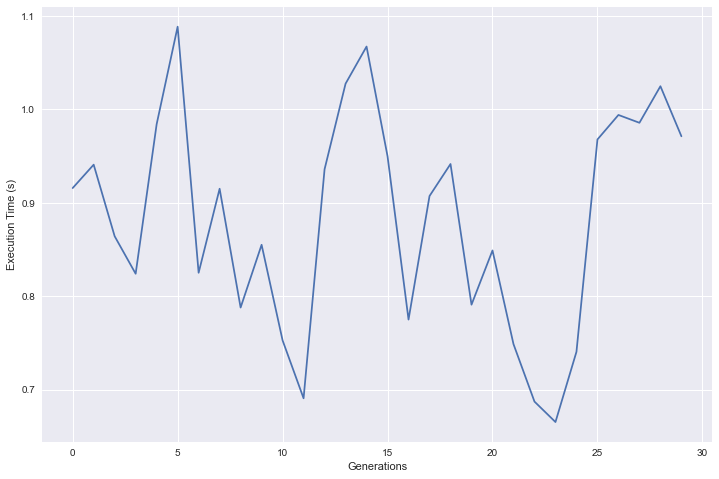

In [ ]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

O gráfico acima destaca o tempo de execução do algorítmo de Evolução Diferencial em cada uma das 30 iterações.

### Algorítmos de Estimação de Distribuição

In [ ]:
all_best_solutions = []
    
cga = CompactGA(
    ng=100,
    np=50, 
    pmin=0.04, 
    pmax=0.93, 
    alpha=0.03, 
    nbits=5, 
    evfunc='Colville'
)
cga.evolve()

all_best_solutions = cga.get_all_best_solutions()

GERAÇÃO: 100

Para a minimização da função de Ackley, os parâmetros utilizados para o algorítmo de Estimação de Distribuição  GA Compacto cosistiram em:
    
    1. Número de Gerações: 100
    
    2. Tamanho da População: 50
    
    3. Probabilidade Mínima: 0.04
    
    4. Probabilidade Máxima: 0.93
    
    5. Taxa de Aprendizado: 0.03
    

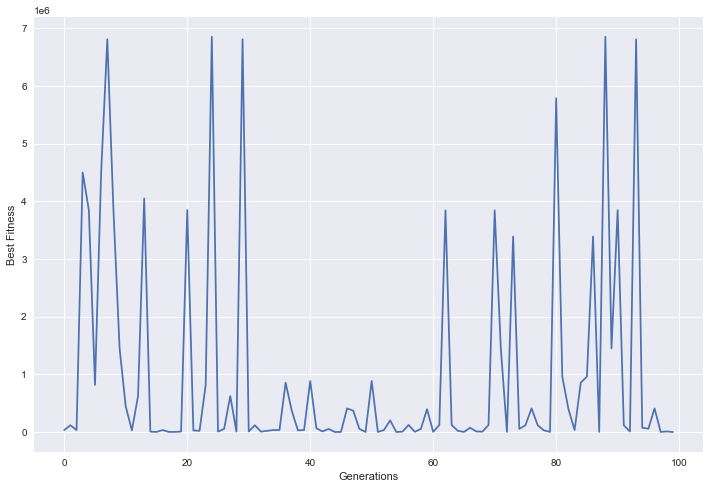

In [ ]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

O gráfico acima apresenta o fitness da melhor solução em cada geração.

In [ ]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 894.2909999999999	Q1: 10554.800000000001	Q2: 70271.3	Q3: 855171.6	Max: 1962.4
1010499.3500000003


Cerca de 50% das melhores soluções candidatas obtveram um valor do fitness entre 10554.80 e 855171.6.

A seguir, será realizada a execução do algoritmo de Estimação de Distribuição GA Compacto 30 vezes, com o objetivo de analizar o seu tempo de execução e a melhor solução encontrada en cada uma das iterações. 

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    cga = CompactGA(
        ng=100,
        np=50, 
        pmin=0.04, 
        pmax=0.93, 
        alpha=0.03, 
        nbits=5, 
        evfunc='Colville'
    )
    cga.evolve()

    all_best_solutions.append(cga.get_best_solution())
    all_execution_time.append(cga.get_execution_time())

GERAÇÃO: 100

In [ ]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 127.66333333333334
Variance: 38107.19965555554
Standard Deviation: 195.21065456464086


A partir das 30 execuções, pode-se observar que a média das melhores soluções candidatas ficou em torno de  127.66 e o desvio padrão 195.21.

In [ ]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 2.0141525268554688
Variance: 0.02547168312830763
Standard Deviation: 0.15959850603407172


O tempo de execução médio em segundos de cada uma das iterações ficou em torno de 2.01 e desvio padrão de 0.159.

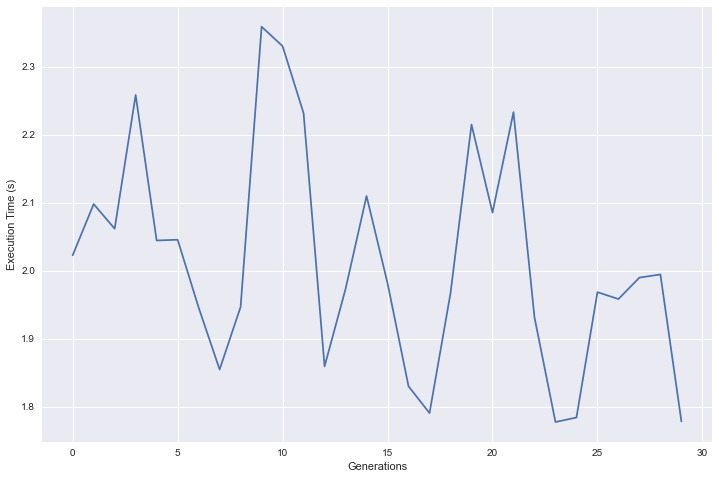

In [ ]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

O gráfico acima destaca o tempo de execução do algorítmo de Estimação de Distribuição GA Compacto em cada uma das 30 iterações.

## Algoritmo Genético

Para esse algorítmo utilizou-se uma população de 300 indivíduos e taxa de mutação de 10%. Ademais, A recombinação foi a "whole arithmetic recombination", a mutação foi "uniform mutation" e a seleção de pais, quanto de prole foi "fitness proportional selection", mas dessa vez selecionando os 50 melhores. Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 1000 gerações.  O gráfico apareceu distorcido devido aos valores muito altos na população inicial, fazendo com que pareça que a convergência é quase instantânea

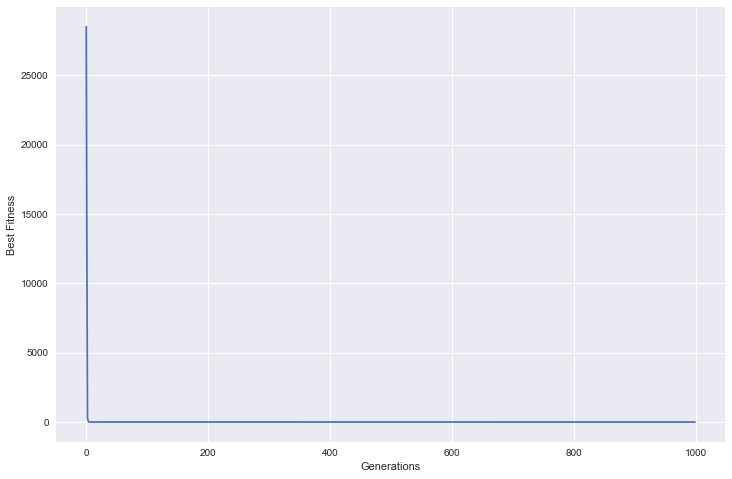

In [ ]:
UB = 32
LB = -32
GENERATIONS = 1000
pop = np.random.uniform(low=LB, high=UB, size=(300,4))
    
model = ModelGA(
    pop,
    Colville().compute, 
    "whole arithmetic recombination best", 
    "uniform mutation",
    "fitness proportional selection kbest",
    "fitness proportional selection kbest",
    0.1,
    GENERATIONS,
    UB,
    LB,
    0,
    alpha=0.8
)
    
ga_alg = GA(model)
ga_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)### Evolução Diferencial
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "0,46" com um desvio padrão de "0,06". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 16 s.

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    ga_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

In [ ]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 0.4563857643542324
Variance: 0.003863263762337132
Standard Deviation: 0.06215515877493301


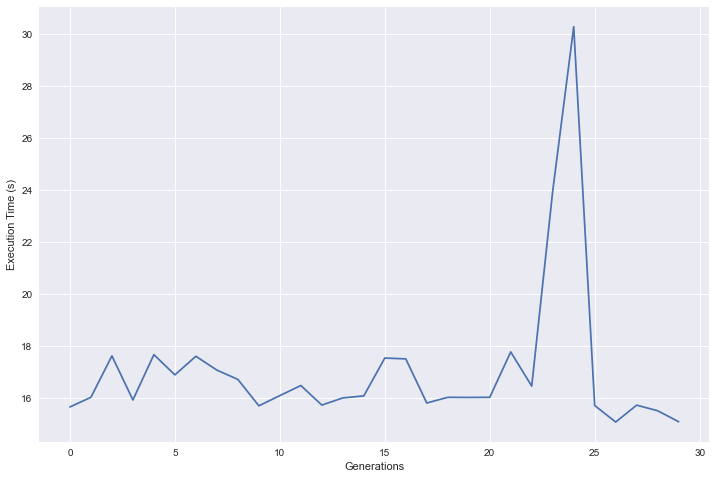

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

## Estratégia de Evolução

Para esse algorítmo utilizou-se um "mu" de 40, um "lambda" de 300, um "sigma" de 2 (o qual muda comforme a regra de 1/5). Ademais, não houve recombinação, a mutação foi "uniform mutation", a seleção de pais foi uniforme e a de filhos foi a "mu,lambda". Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 1500 gerações.

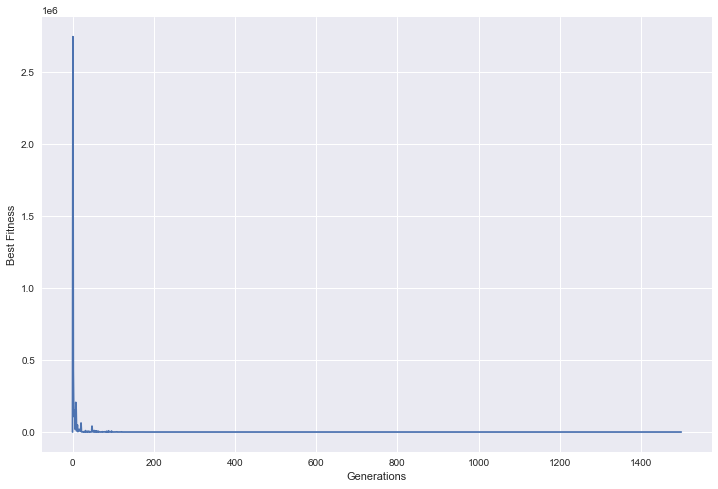

In [ ]:
GENERATIONS = 1500
pop_size = 40
pop = np.random.uniform(low=-32, high=32, size=(pop_size,4))
model = ModelES(
    pop,
    Colville().compute,
    "uniform mutation",
    "mu,lambda",
    "random",
    2,
    300,
    40,
    10,
    GENERATIONS,
    UB,
    LB,
    0)
    
    
es_alg = ES(model)
es_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "4,81e-26" com um desvio padrão de "2,59e-25". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 14 s, com um pico considerável em 26 s.

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    es_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

In [ ]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 4.81787477389965e-26
Variance: 6.731406429553779e-50
Standard Deviation: 2.594495409430084e-25


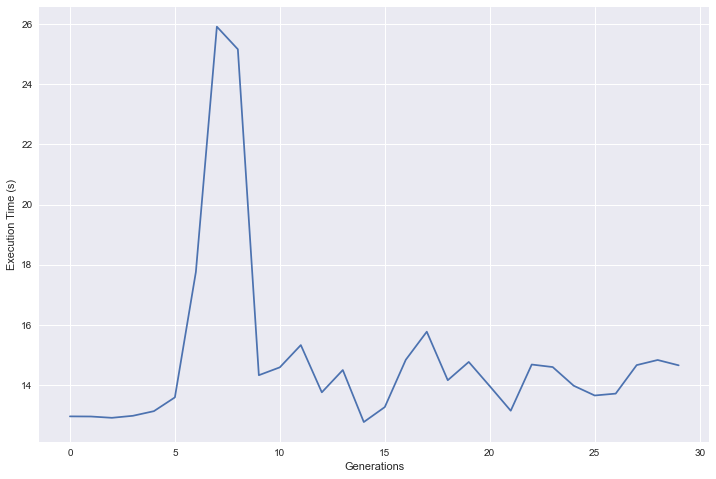

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()